Julia Joveneau - 42611800

LMAPR1492 - Tache 8

29 mars 2021

In [61]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
import matplotlib.pyplot as plt 
import numpy as np
import itertools

In [2]:
#Importation de la structure de bande 
with MPRester("0xKCQrLrxyfoPKG3N") as m:
    bandstructure = m.get_bandstructure_by_material_id("mp-7477")

### Détermination de la bande interdite

In [62]:
bandgap = bandstructure.get_band_gap()
print("Energie : {} ev \nBande directe : {} \nTransition : {}".format(bandgap['energy'], 'oui' if bandgap['direct'] else 'non', bandgap['transition']))

Energie : 3.6429 ev 
Bande directe : non 
Transition : \Gamma-F


### Dispersions maximales et minimales


Les indices des bandes de valences et de conduction sont respectivement [13, 14] et [15]


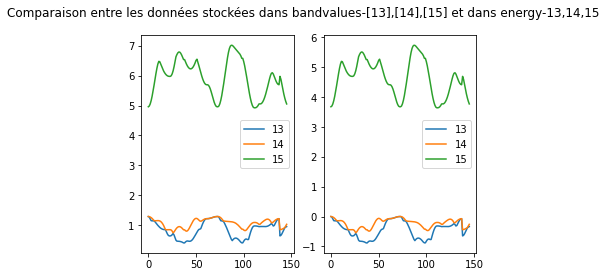

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

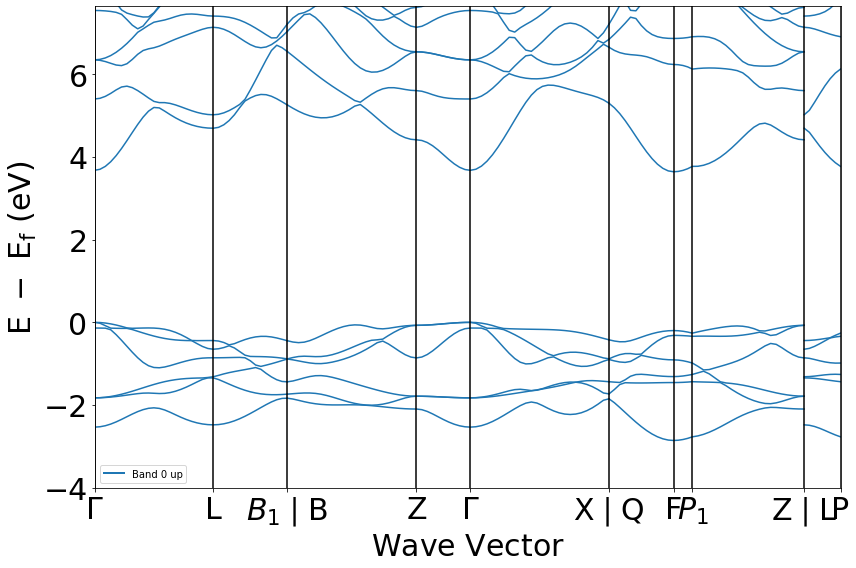

In [63]:
plotter = BSPlotter(bandstructure)
data = plotter.bs_plot_data()

idxvbm = list(bandstructure.get_vbm()['band_index'].values())[0]
idxcbm = list(bandstructure.get_cbm()['band_index'].values())[0]
print("Les indices des bandes de valences et de conduction sont respectivement {} et {}".format(idxvbm, idxcbm))

#Valeur des énergies chemin par chemin 
energy13path = []
energy14path = []
energy15path = []
for i in range(9) : 
    energy13path.append(data['energy']['1'][i][13])
    energy14path.append(data['energy']['1'][i][14])
    energy15path.append(data['energy']['1'][i][15])
energy13 = list(itertools.chain.from_iterable(energy13path))
energy14 = list(itertools.chain.from_iterable(energy14path))
energy15 = list(itertools.chain.from_iterable(energy15path))

#Valeur des énergies d'après l'attribut bands
bandvalues = list(bandstructure.bands.values())[0]

#Plot des bandes de conduction et de valence - comparaison 
ks = np.arange(0,146)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparaison entre les données stockées dans bandvalues-[13],[14],[15] et dans energy-13,14,15')
ax1.plot(ks, bandvalues[13], label='13')
ax1.plot(ks, bandvalues[14], label='14')
ax1.plot(ks, bandvalues[15], label='15')
ax1.legend()

ax2.plot([i for i in range(len(energy13))], energy13, label='13')
ax2.plot([i for i in range(len(energy13))], energy14, label='14')
ax2.plot([i for i in range(len(energy13))], energy15, label='15')
ax2.legend()

plt.show()


#Plot du module BSPlotter
plotter.get_plot()

On voit que les bandes 13 et 14 se partagent le maximum de la bande de valence. Par souci de facilité, la suite du document se concentre sur les bandes 14 et 15 uniquement. 

N'étant pas sure de l'interprétation à donner à la plus grande dispersion, j'ai fait le calcul de deux façons différentes : 

- Premièrement en calculant la pente entre chaque point des abscisses
- Deuxièmement en calculant la pente entre les deux points extrêmes d'un même chemin, cela pour chaque chemin

#### Dispersions locales 

In [65]:
distances = data['distances'] #abscisses chemin par chemin

deltaE14 = 0
deltaE15 = 0
deltak = 0
cnt = 0
dispmax14 = 0; dispmin14 = 10000000000
dispmax15 = 0; dispmin15 = 10000000000

k15max = [0,0]; k15min = [0,0] 
k14max = [0,0]; k14min = [0,0] #abscisses des dispersions maximales et minimales pour les bandes 14 et 15
for i in range(len(distances)-1) : #on ne considère pas le dernier chemin qui présente une discontinuité
    for j in range(len(distances[i])) : 
        if j==len(distances[i])-1 and i!=len(distances)-2 : 
            k1 = distances[i][j]
            k2 = distances[i+1][1]
            deltak = abs(k1 - k2)
        elif j==len(distances[i])-1 and i==len(distances)-2 : 
            break
        else :
            k1 = distances[i][j]
            k2 = distances[i][j+1]
            deltak = abs(k1 - k2)
        deltaE14 = abs(energy14[cnt] - energy14[cnt+1])
        deltaE15 = abs(energy15[cnt] - energy15[cnt+1])
        disp14 = deltaE14/deltak
        disp15 = deltaE15/deltak
        if disp14>dispmax14 :
            dispmax14 = disp14
            k14max[0] = k1; k14max[1] = k2
        if disp14<dispmin14 : 
            dispmin14 = disp14
            k14min[0] = k1; k14min[1] = k2
        if disp15>dispmax15 :
            dispmax15 = disp15
            k15max[0] = k1; k15max[1] = k2
        if disp15<dispmin15 : 
            dispmin15 = disp15
            k15min[0] = k1; k15min[1] = k2
        cnt+=1
        
#Determination des chemins contenant les dispersions maximales et minimales       
pathmax14 = 20; pathmin14 = 20; pathmax15 = 20; pathmin15 = 20
for path in range(len(distances)) : 
    try : 
        pathmax15 = list(distances[path]).index(k15max[0])
        pathmax15 = [path, pathmax15]
    except : 
        continue
for path in range(len(distances)) : 
    try : 
        pathmin15 = list(distances[path]).index(k15min[0])
        pathmin15 = [path, pathmin15]
    except : 
        continue
for path in range(len(distances)) : 
    try : 
        pathmax14 = list(distances[path]).index(k14max[0])
        pathmax14 = [path, pathmax14]
    except : 
        continue
for path in range(len(distances)) : 
    try : 
        pathmin14 = list(distances[path]).index(k14min[0])
        pathmin14 = [path, pathmin14]
    except : 
        continue

print("Bande de valence :")
print("La plus grande dispersion est entre les points {} et {} sur le chemin {}".format(k14max[0], k14max[1], pathmax14[0]))
print("La plus petite dispersion est entre les points {} et {} sur le chemin {}".format(k14min[0], k14min[1], pathmin14[0]))
print("\n")
print("Bande de conduction :")
print("La plus grande dispersion est entre les points {} et {} sur le chemin {}".format(k15max[0], k15max[1], pathmax15[0]))
print("La plus petite dispersion est entre les points {} et {} sur le chemin {}".format(k15min[0], k15min[1], pathmin15[0]))


#Code utilisé pour créer la figure présente ci-dessous
#plotter.get_plot()
#plt.scatter(k15max[0], energy15path[pathmax15[0]][pathmax15[1]], c='r')
#plt.scatter(k15min[0], energy15path[pathmin15[0]][pathmin15[1]], c='g')
#plt.scatter(k14max[0], energy14path[pathmax14[0]][pathmax14[1]], c='r')
#plt.scatter(k14min[0], energy14path[pathmin14[0]][pathmin14[1]], c='g')

Bande de valence :
La plus grande dispersion est entre les points 0.8162690861926201 et 0.8642849085783728 sur le chemin 0
La plus petite dispersion est entre les points 1.0563482192483487 et 1.1034490762870477 sur le chemin 1


Bande de conduction :
La plus grande dispersion est entre les points 3.6901652587817253 et 3.7395247568784695 sur le chemin 4
La plus petite dispersion est entre les points 1.0563482192483487 et 1.1034490762870477 sur le chemin 1


<div>
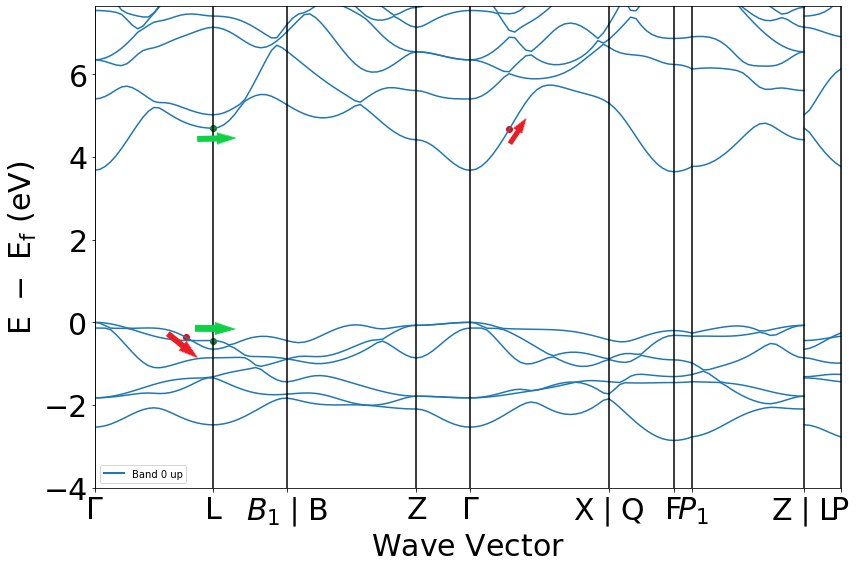
</div>


Note 1 : On choisit de ne représenter qu'un point de dispersion minimale, bien que d'autres points ont l'air d'exister d'après la figure.

Note 2 : On choisit de ne pas prendre en compte le dernier chemin, qui présente une discontinuité à la jonction avec l'avant dernier. Si on le prend en compte, c'est bien à cette discontinuité que cette méthode va calculer la plus grande pente et donc la plus grande dispersion. 

#### Dispersions globales sur les chemins

In [67]:
dispersions14 = [] #stock tuples des dispersions pour chaque chemin sur la bande de valence
dispersions15 = [] #stock tuples des dispersion pour chaque chemin sur la bande de conduction 

for i in range(len(distances)) : #cette fois on prend en compte le dernier chemin
    deltak = abs(distances[i][-1]-distances[i][1])
    dispersions15.append(abs(energy15path[i][0]-energy15path[i][-1])/deltak)
    dispersions14.append(abs(energy14path[i][0]-energy14path[i][-1])/deltak)
    
#détermination des chemins de plus grande/plus petite dispersion sur chacune des deux bandes 
pathmax15 = list(dispersions15).index(max(dispersions15))
pathmin15 = list(dispersions15).index(min(dispersions15))
pathmax14= list(dispersions14).index(max(dispersions14))
pathmin14 = list(dispersions14).index(min(dispersions14))


print("Bande de valence :")
print("La plus grande dispersion est sur le chemin {}".format(pathmax14))
print("La plus petite dispersion est sur le chemin {}".format(pathmin14))
print("\n")
print("Bande de conduction :")
print("La plus grande dispersion est sur le chemin {}".format(pathmax15))
print("La plus petite dispersion est sur le chemin {}".format(pathmin15))


#Code utilisé pour créer la figure présente ci-dessous
#plotter.get_plot()
#plt.scatter(distances[pathmax15][0], energy15path[pathmax15][0], c='r')
#plt.scatter(distances[pathmax15][-1], energy15path[pathmax15][-1], c='r')
#plt.scatter(distances[pathmin15][0], energy15path[pathmin15][0], c='g')
#plt.scatter(distances[pathmin15][-1], energy15path[pathmin15][-1], c='g')
#plt.scatter(distances[pathmax14][0], energy14path[pathmax14][0], c='r')
#plt.scatter(distances[pathmax14][-1], energy14path[pathmax14][-1], c='r')
#plt.scatter(distances[pathmin14][0], energy14path[pathmin14][0], c='g')
#plt.scatter(distances[pathmin14][-1], energy14path[pathmin14][-1], c='g')

Bande de valence :
La plus grande dispersion est sur le chemin 8
La plus petite dispersion est sur le chemin 1


Bande de conduction :
La plus grande dispersion est sur le chemin 8
La plus petite dispersion est sur le chemin 7


<div>
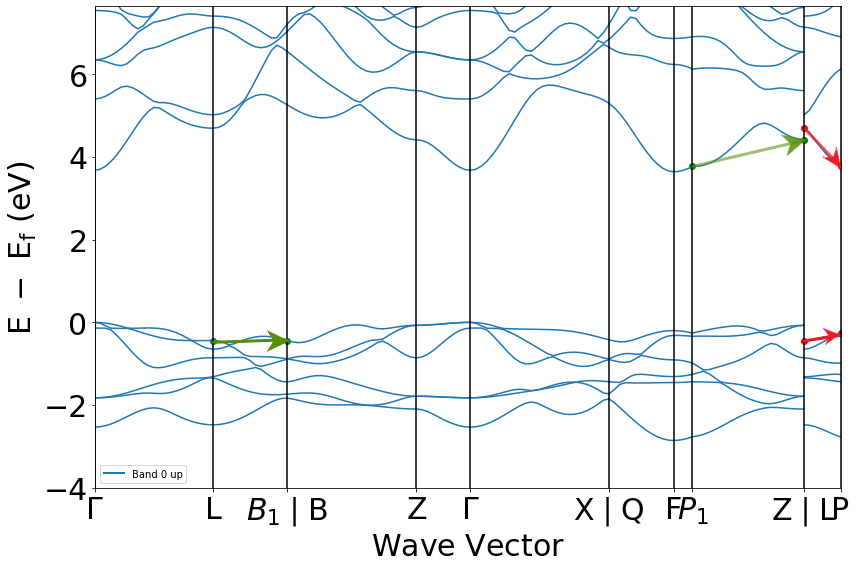
</div>

### Masse effective

De nouveau, deux interprétations me semblent être à considérer : 
- Dispersion parabolique locale (on considère trois points : l'extrema de la bande et ses deux voisins directs)
- Dispersion parabolique sur l'ensemble du chemin comprenant l'extrema

Cependant, comme on le verra plus loin, les extrema se trouvent pour les deux bandes en un point entre deux chemins distincts. La seconde interprétation ne me semble donc pas pertinente. Uniquement la première interprétation est donc développée ci-dessous.

La masse effective est d'expression $$m^* = \hbar^2\left(\frac{\partial^2E}{\partial k^2}\right)^{-1} ,$$
avec, sous l'hypothèse d'une dispersion parabolique, $E(k) = ak^2 + bk + c$, où $a, b, c$ sont à déterminer.


In [68]:
print("Les tuples (k, E) des extrema des bandes de valence et de conduction sont, respectivement : ")
print(data['vbm'])
print(data['cbm'])

#Verification que les extrema des bandes de valence et de conduction sont bien respectivement sur les chemins 3 et 5
idxonpath3 = list(distances[3]).index(data['vbm'][1][0])
idxonpath5 = list(distances[5]).index(data['cbm'][1][0])

Les tuples (k, E) des extrema des bandes de valence et de conduction sont, respectivement : 
[(0.0, 0.0), (3.344648880618251, 0.0), (3.344648880618251, 0.0)]
[(5.153211254926782, 3.6429), (5.153211254926782, 3.6429)]


Bande de valence : 
On prend comme maximum le point $(3.344648880618251, 0.0)$. Il se trouve entre les chemins 3, $Z-\Gamma$, et 4, $\Gamma-X|Q$. (voir figure) 

Bande de conduction : 
On prend comme minimum le point $(5.153211254926782, 3.6429)$. Il se trouve entre les chemins 5, $X|Q-F$, et 6, $F-P_1$. (voir figure)

On interpole ces deux points et leurs deux voisins directs à l'aide de la fonction $\textit{polyfit}$ de $\textit{numpy}$.

In [72]:
##Bande de valence
x = [distances[3][-2], distances[3][-1], distances[4][1]]
y = [energy14path[3][-2], energy14path[3][-1], energy14path[4][1]]
abc = np.polyfit(x,y,2)
print("La dispersion parabolique locale autour du maximum de la bande de valence est d'expression :\nE(k) = {}x^2 + {}x {} [eV]".format(abc[0], abc[1], abc[2]))
print("La valeur de la masse effective est : \n(1.054571817 * 10^-34)^2 * (1/2*({})) * 10^20 * 1.60218*10^19  = {} [kg]\n".format(abc[0],((1.054571817*10**(-34))**2)*(1/2*(abc[0]))*(10**20)*1.60218*10**19))

#Code pour créer la figure ci-dessous
#plotter.get_plot()
#plt.scatter(x,y)

##Bande de conduction 
x = [distances[5][-2], distances[5][-1], distances[6][1]]
y = [energy15path[5][-2], energy15path[5][-1], energy15path[6][1]]
abc = np.polyfit(x,y,2)
print("La dispersion parabolique locale autour du maximum de la bande de conduction est d'expression :\nE(k) = {}x^2 + {}x {} [eV]".format(abc[0], abc[1], abc[2]))
print("La valeur de la masse effective est : \n(1.054571817 * 10^-34)^2 * (1/2*({})) * 10^20 * 1.60218*10^19  = {} [kg]".format(abc[0],((1.054571817*10**(-34))**2)*(1/2*(abc[0]))*(10**20)*1.60218*10**19))

#Suite du code pour créer la figure ci-dessous
#plt.scatter(x,y)
#plt.scatter(data['cbm'][0][0], data['cbm'][0][1])
#plt.scatter(data['vbm'][1][0], data['vbm'][1][1])

La dispersion parabolique locale autour du maximum de la bande de valence est d'expression :
E(k) = -1.3631680775381723x^2 + 9.088676740001274x -15.149112684273044 [eV]
La valeur de la masse effective est : 
(1.054571817 * 10^-34)^2 * (1/2*(-1.3631680775381723)) * 10^20 * 1.60218*10^19  = -1.2144595082081584e-29 [kg]

La dispersion parabolique locale autour du maximum de la bande de conduction est d'expression :
E(k) = 7.09970322079724x^2 + -73.27327177584067x 192.69876765716452 [eV]
La valeur de la masse effective est : 
(1.054571817 * 10^-34)^2 * (1/2*(7.09970322079724)) * 10^20 * 1.60218*10^19  = 6.325193660289369e-29 [kg]


On note qu'on obtient bien une masse effective négative pour le maximum de la bande de valence, et une masse effective positive pour le minimum de la bande de conduction, comme attendu. 

<div>
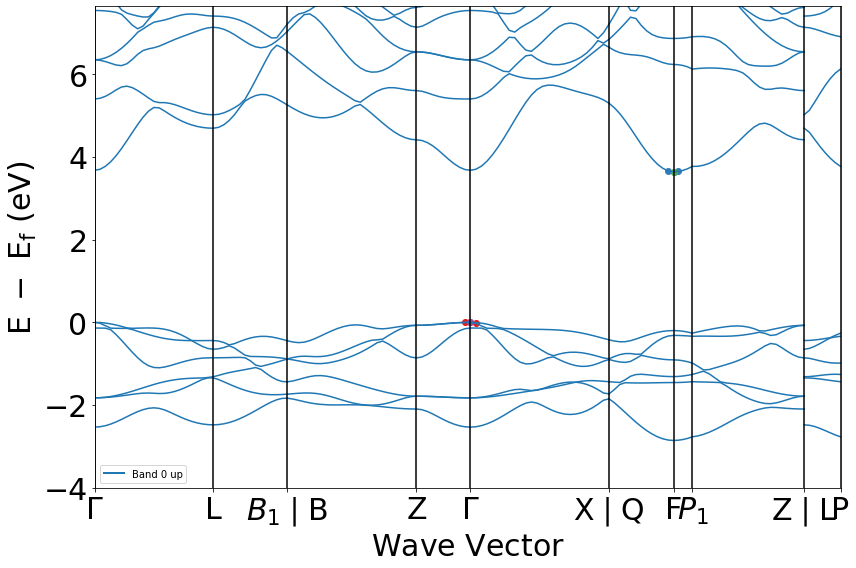
</div>
